In [188]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import geopandas as gpd
from cartopy import crs as ccrs
import numpy as np
import pandas as pd
%matplotlib inline

In [189]:
# shapefile from https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm
# cite as : Boundary Files, 2016 Census. Statistics Canada Catalogue no. 92-160-X
province = gpd.read_file('./GIS Data/Canada/lpr_000b16a_e.shp')
codes = ["NL","PE","NS","NB","QC","ON","MB","SK","AB","BC","YT","NT","NU"]
province["ID"] = codes
province.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry,ID
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",PE
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",NS
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",NB
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC


In [190]:
states = gpd.read_file('./GIS Data/US/cb_2018_us_state_20m.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [191]:
## merge both datasets
canada = gpd.GeoDataFrame()
canada["ID"] = province["ID"]
canada["geometry"] = province["geometry"]
canada = canada.to_crs("EPSG:3395") # Spherical Mercator

# remove hawaii and other extra-continental
states = states[np.logical_not(states["STUSPS"].isin(["HI","VI","PR","AS","GU","MP","AK"]))]

us = gpd.GeoDataFrame()
us["ID"] = states["STUSPS"]
us["geometry"] = states["geometry"]
us = us.to_crs("EPSG:3395") # Spherical Mercator

places = pd.concat([canada, us], ignore_index=True)
places.head()

,ID,geometry
0,NL,"MULTIPOLYGON (((-6390025.857 7163888.320, -638..."
1,PE,"MULTIPOLYGON (((-6899916.801 5823023.215, -689..."
2,NS,"MULTIPOLYGON (((-6890936.419 5730258.184, -689..."
3,NB,"MULTIPOLYGON (((-7213675.170 6042579.261, -721..."
4,QC,"MULTIPOLYGON (((-6528556.268 6624871.363, -652..."


In [192]:
# data from https://droughtmonitor.unl.edu/CurrentMap.aspx
drought = gpd.read_file('./GIS Data/US/USDM_20211214.shp')
drought.head()
drought = drought.to_crs("EPSG:3395") # Spherical Mercator

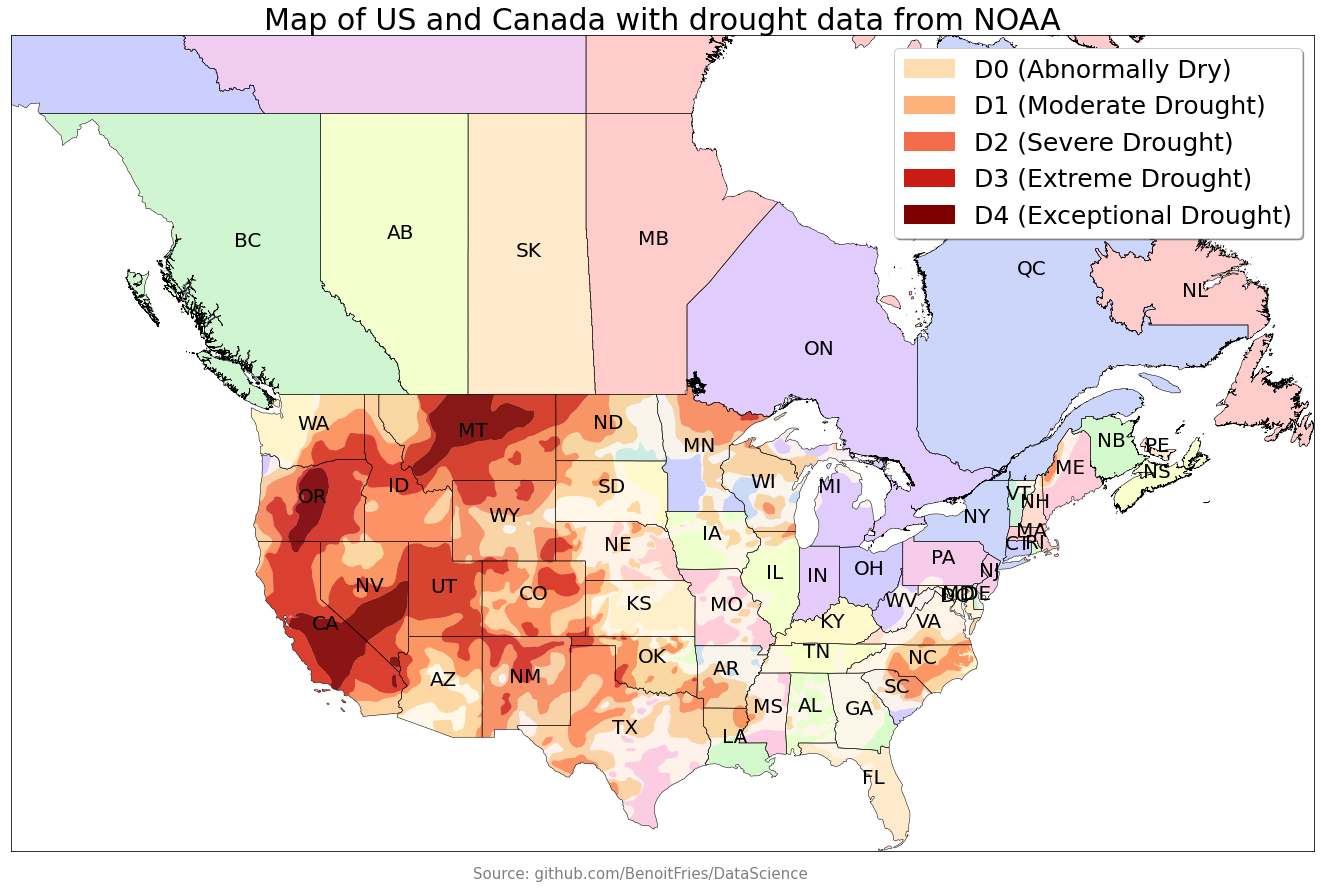

In [214]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
places.plot(ax=ax, cmap="prism", alpha=.2)

places.apply(lambda x: ax.annotate(text=x.ID, xy=x.geometry.centroid.coords[0], ha='center', fontsize=20),axis=1);
places.boundary.plot(ax=ax, color='k', linewidth=.5)

# zoom in (north of canada takes too much space)
minx, miny, maxx, maxy = places.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy/2)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

colormap = plt.cm.OrRd
drought.plot(ax=ax, cmap=colormap, alpha=0.9)

d0 = mpatches.Patch(color=colormap(0.2), label='D0 (Abnormally Dry)')
d1 = mpatches.Patch(color=colormap(0.4), label='D1 (Moderate Drought)')
d2 = mpatches.Patch(color=colormap(0.6), label='D2 (Severe Drought)')
d3 = mpatches.Patch(color=colormap(0.8), label='D3 (Extreme Drought)')
d4 = mpatches.Patch(color=colormap(1.0), label='D4 (Exceptional Drought)')


ax.legend(handles=[d0,d1,d2,d3,d4], fancybox=True, shadow=True, fontsize=25)
    
plt.title('GIS Map of US and Canada with drought data from NOAA', fontdict={"fontsize":30} )
plt.figtext(0.5, 0.1, 'Source: github.com/BenoitFries/DataScience', 
            horizontalalignment='center', alpha=0.5, fontsize=15) 

plt.savefig("NorthAmerica_Map_Drought.png")
plt.show()